<a href="https://www.kaggle.com/code/ainurrohmanbwx/hotel-booking-analytics?scriptVersionId=146235940" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This hotel booking analysis constitutes an in-depth investigation of a dataset spanning two years, starting from 2015 to 2017. Through a series of steps, including data preprocessing, descriptive statistics, and examining the distribution of guests from various countries, we aim to unearth valuable insights in the hospitality industry. Additionally, the comparison between "assigned" and "reserved" room types will provide insights into different booking practices. In this analysis, we will also identify the most productive market segments in terms of bookings and analyze the average price per night across all segments. Furthermore, by examining guest arrival patterns, we can understand the time dynamics that impact hotel operations. Lastly, by conducting a test of guest arrival distribution, we will undergo a crucial phase in testing the validity of our data. All of this will aid us in making better decisions in managing and marketing this hotel.

# Load Data (Extract)

In [1]:
# Disable warning

import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Features explanation

- **hotel**: This is the type of hotel where the reservation was made. There may be several values such as "Resort Hotel" or "City Hotel".
- **is_canceled**: This is a binary feature that indicates whether the reservation was canceled (1) or not (0).
- **lead_time**: This is the number of days between the reservation date and the guest's arrival date.
- **arrival_date_year**: Year from guest arrival date.
- **arrival_date_month**: Month from guest arrival date.
- **arrival_date_week_number**: Week number of the year when the guest arrives.
- **arrival_date_day_of_month**: Day of the month when the guest arrives.
- **stays_in_weekend_nights**: The number of nights the guest stayed on the weekend.
- **stays_in_week_nights**: The number of nights the guest stayed during weekdays.
- **adults**: The number of adults in the group who reserved the room.
- **children**: The number of children in the group who reserved the room.
- **babies**: Number of babies in the group that reserved the room.
- **meal**: The type of meal provided in the meal plan (for example, 'BB' for Bed & Breakfast).
- **country**: The guest's country of origin.
- **market_segment**: Market segment used for reservations (for example, 'Online TA' for online Travel Agents).
- **distribution_channel**: The distribution channel used to make a reservation (for example, 'TA/TO' for Travel Agents and Tour Operators).
- **is_repeated_guest**: This is a binary feature that indicates whether the guest is a repeat guest (1) or not (0).
- **previous_cancellations**: Number of previous reservations canceled by the guest.
- **previous_bookings_not_canceled**: Number of previous reservations that were not canceled by the guest.
- **reserved_room_type**: The room type that has been reserved by the guest.
- **assigned_room_type**: The actual room type assigned to the guest at check-in.
- **booking_changes**: The number of changes made to a reservation before guests check-in.
- **deposit_type**: The type of deposit the guest must pay (for example, 'No Deposit' or 'Non-Refund').
- **agent**: Intermediary agent ID responsible for the reservation.
- **company**: ID of the company responsible for the reservation if applicable.
- **days_in_waiting_list**: The number of days a reservation was on the waiting list before being confirmed.
- **customer_type**: Guest type (for example, 'Transient' for temporary guests or 'Contract' for guests on a long-term contract).
- **adr**: Average Daily Rate, namely the average rate per night paid by guests.
- **required_car_parking_spaces**: The number of parking spaces required by the guest.
- **total_of_special_requests**: Number of special requests made by guests (for example, requests for extra beds or special meals).
- **reservation_status**: The latest status of the reservation (for example, 'Check-Out' if the guest has already checked out).
- **reservation_status_date**: The last date on which the reservation status was updated.

In [6]:
df.shape

(119390, 32)

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Preprocessing (Transform)

#### Testing some irrelevant features

We will test three features, namely 'adults', 'children', and 'babies. These three features cannot be zero at the same time.

In [9]:
irrelevant_rows = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)
print(f"There are {len(df[irrelevant_rows])} irrelevant rows.")

There are 180 irrelevant rows.


In [10]:
# Remove irrelevant rows
df = df[~irrelevant_rows]
df.shape

(119210, 32)

#### Is there any duplicate data?

In [11]:
# Check for duplicate data
if df.duplicated().any():
    print(f"There are as many as {df.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are as many as 31980 duplicate data.


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# Check again for duplicate data
if df.duplicated().any():
    print(f"There are as many as {df.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


In [14]:
df.shape

(87230, 32)

# Let's Analyze the data (Load)

#### Conduct descriptive analysis

In [15]:
df[['lead_time', 'total_of_special_requests', 'adr']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [16]:
import numpy as np

for col in ['lead_time', 'total_of_special_requests', 'adr']:
    print("Feature name : {}".format(col))
    
    for i in range(90, 101, 1):
     quantile_value = np.quantile(df[col], q=1/100)
     print("{} percentile value is {}".format(i, quantile_value))
    print("\n")

Feature name : lead_time
90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 0.0
100 percentile value is 0.0


Feature name : total_of_special_requests
90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 0.0
100 percentile value is 0.0


Feature name : adr
90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 0.0
100 percentile value is 0.0




#### Where do guests come from?

In [17]:
not_cancelled = df[df['is_canceled'] == 0]

In [18]:
country_wise = not_cancelled['country'].value_counts().reset_index()
country_wise.columns = ['country', 'no_of_guests']
country_wise

,country,no_of_guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [19]:
import plotly.express as px

# Define a custom color scale
color_scale = px.colors.sequential.Plasma

fig = px.choropleth(country_wise,
                   locations='country',
                   color='no_of_guests',
                   hover_name='country',
                   color_continuous_scale=color_scale,
                   title='Country Wise Distribution of Guests',
                   labels={'no_of_guests': 'Number of Guests'},
                   projection="natural earth")

# Customize the appearance
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    showocean=True,
    oceancolor="lightblue"
)

# Customize the legend
fig.update_coloraxes(colorbar_title="Number of Guests")

# Show the plot
fig.show()

#### Is there a difference in room type between assigned and reserved?

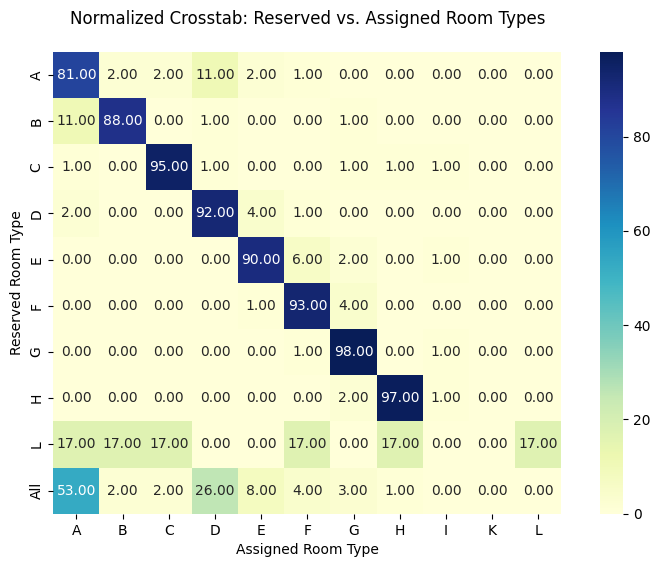

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_normalize = pd.crosstab(index=df['reserved_room_type'], columns=df['assigned_room_type'], margins=True, normalize='index').round(2) * 100

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_normalize, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True)

plt.xlabel("Assigned Room Type")
plt.ylabel("Reserved Room Type")

# Place the title at the bottom
ax.set_title("Normalized Crosstab: Reserved vs. Assigned Room Types", pad=20)  # Adjust the 'pad' value to control the distance between the title and the heatmap

plt.show()

#### Which market segment has the highest bookings?

In [21]:
# Calculate value counts
value_counts = df['market_segment'].value_counts()

# Create the pie chart
fig = px.pie(
    names=value_counts.index,
    values=value_counts.values,
    hole=0.3,  # Donut chart with a hole in the center
)

# Customize the layout and appearance
fig.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0],  # Explode the first slice (0.1)
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='white', width=2))
)

fig.update_layout(
    title="Market Segment Distribution",
    showlegend=False,  # Hide legend
    annotations=[
        dict(text='Market Segment', x=0.5, y=0.5, font_size=20, showarrow=False)
    ],
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margin for title and labels
)

# Show the plot
fig.show()

#### Analysis of average price per night (ADR) of various room types in all market segments

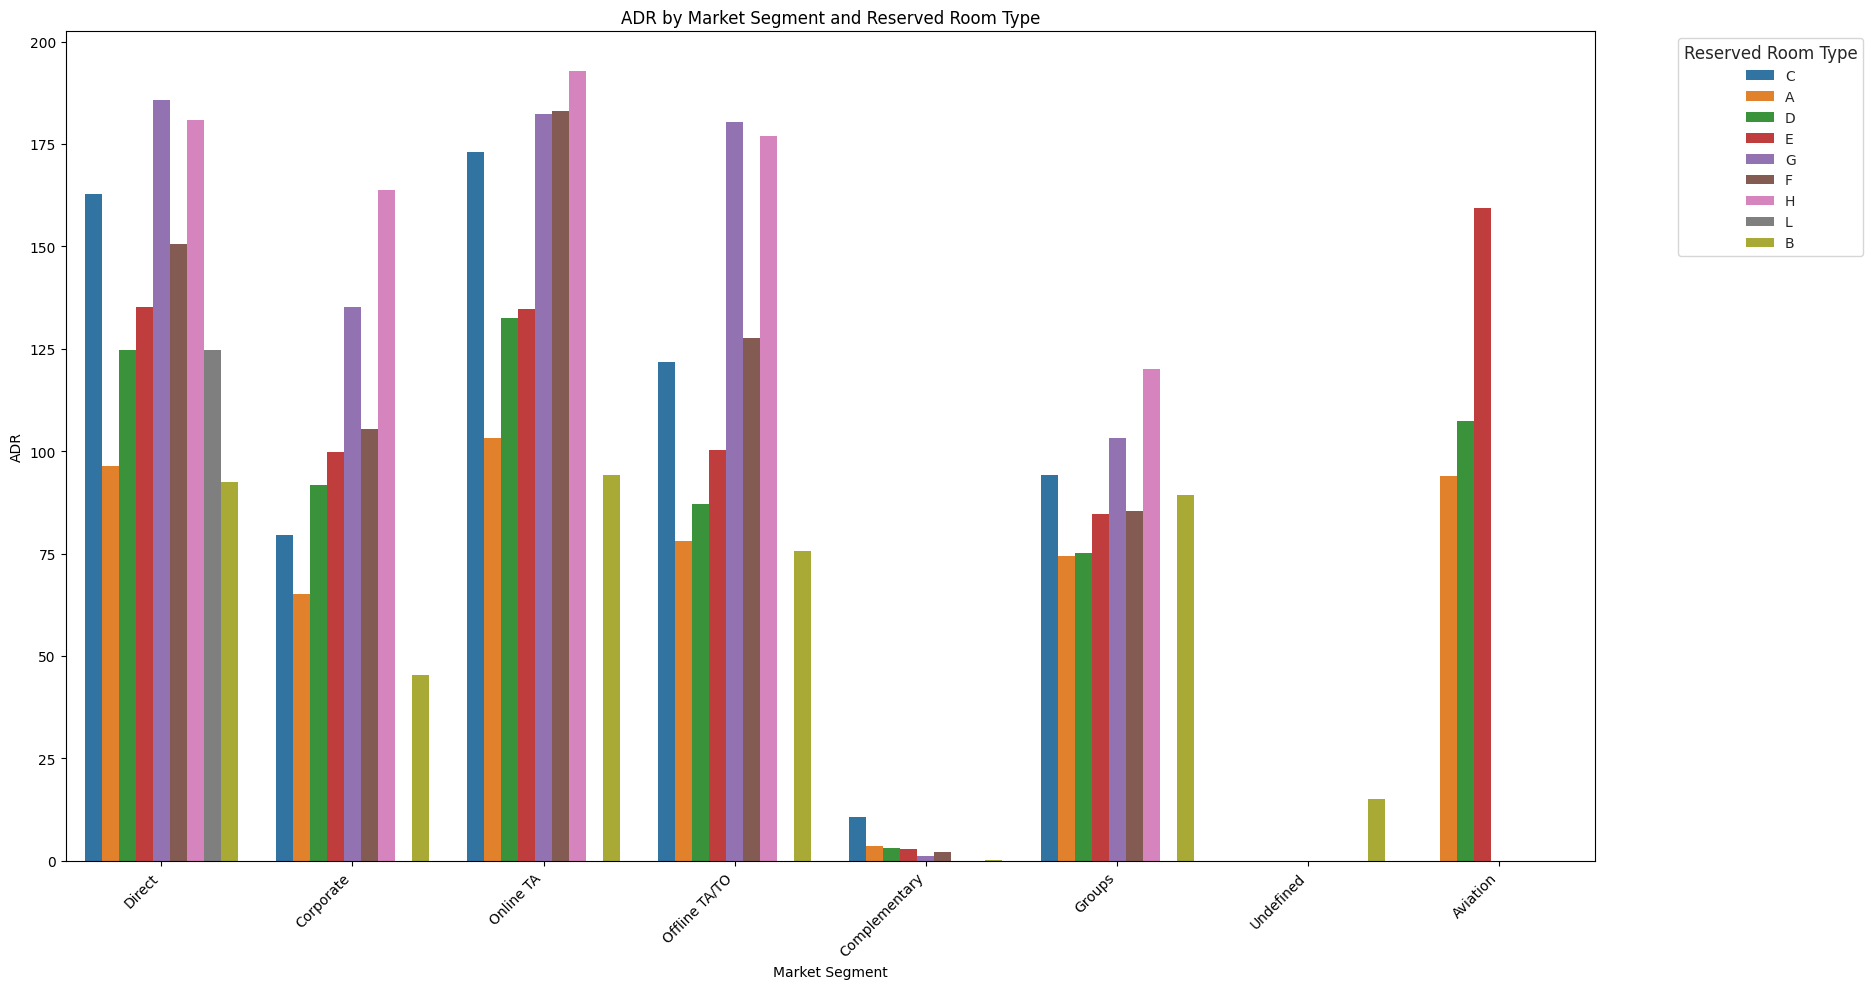

In [22]:
# Create a smaller figure size
plt.figure(figsize=(20, 10))

# Create the barplot with adjusted width and dodge
fig = sns.barplot(x='market_segment', y='adr', hue='reserved_room_type', data=df, ci=None, dodge=True)

# Customize the appearance
sns.set_style("whitegrid")

# Set labels and title
plt.xlabel("Market Segment")
plt.ylabel("ADR")
plt.title("ADR by Market Segment and Reserved Room Type")

# Rotate and stagger x-axis labels
plt.xticks(rotation=45, ha="right")

# Create a separate legend figure and adjust its position
legend = plt.legend(title="Reserved Room Type", title_fontsize="12", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()

# Show the legend as a separate figure
plt.subplots_adjust(right=0.8)  # Adjust the right margin to make space for the legend
plt.show()

#### Understand guest arrival patterns

In [23]:
# Define a dictionary to map month names to numbers
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Replace the month names with numbers
df['arrival_date_month_index'] = df['arrival_date_month'].replace(month_mapping)

In [24]:
df[['arrival_date_year','arrival_date_month_index', 'arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1


In [25]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month_index'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'].head()

0    2015-7-1
1    2015-7-1
2    2015-7-1
3    2015-7-1
4    2015-7-1
Name: arrival_date, dtype: object

In [26]:
df[['adults', 'children', 'babies']].head()

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0


In [27]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: total_guests, dtype: float64

In [28]:
df[['arrival_date', 'total_guests']].head()

,arrival_date,total_guests
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0


In [29]:
df.groupby('arrival_date')['total_guests'].sum().head()

arrival_date
2015-10-1     171.0
2015-10-10    210.0
2015-10-11    144.0
2015-10-12    235.0
2015-10-13    128.0
Name: total_guests, dtype: float64

In [30]:
not_cancelled = df[df['is_canceled'] == 0]

In [31]:
guests_arrival = not_cancelled.groupby('arrival_date')['total_guests'].sum()
guests_arrival.head()

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
Name: total_guests, dtype: float64

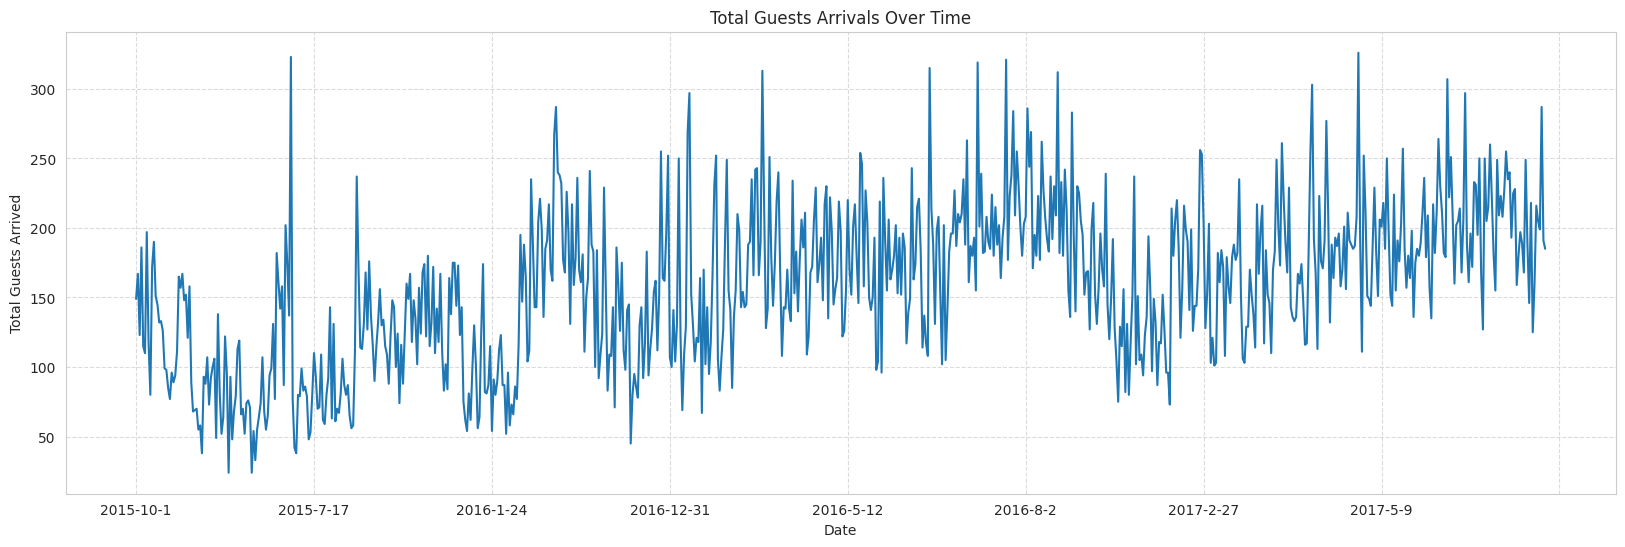

In [32]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the data
guests_arrival.plot()

# Add title
plt.title('Total Guests Arrivals Over Time')

# Add labels
plt.xlabel('Date')
plt.ylabel('Total Guests Arrived')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the style
plt.style.use('seaborn-darkgrid')

# Show the plot
plt.show()

#### Analysis of guest arrival distribution

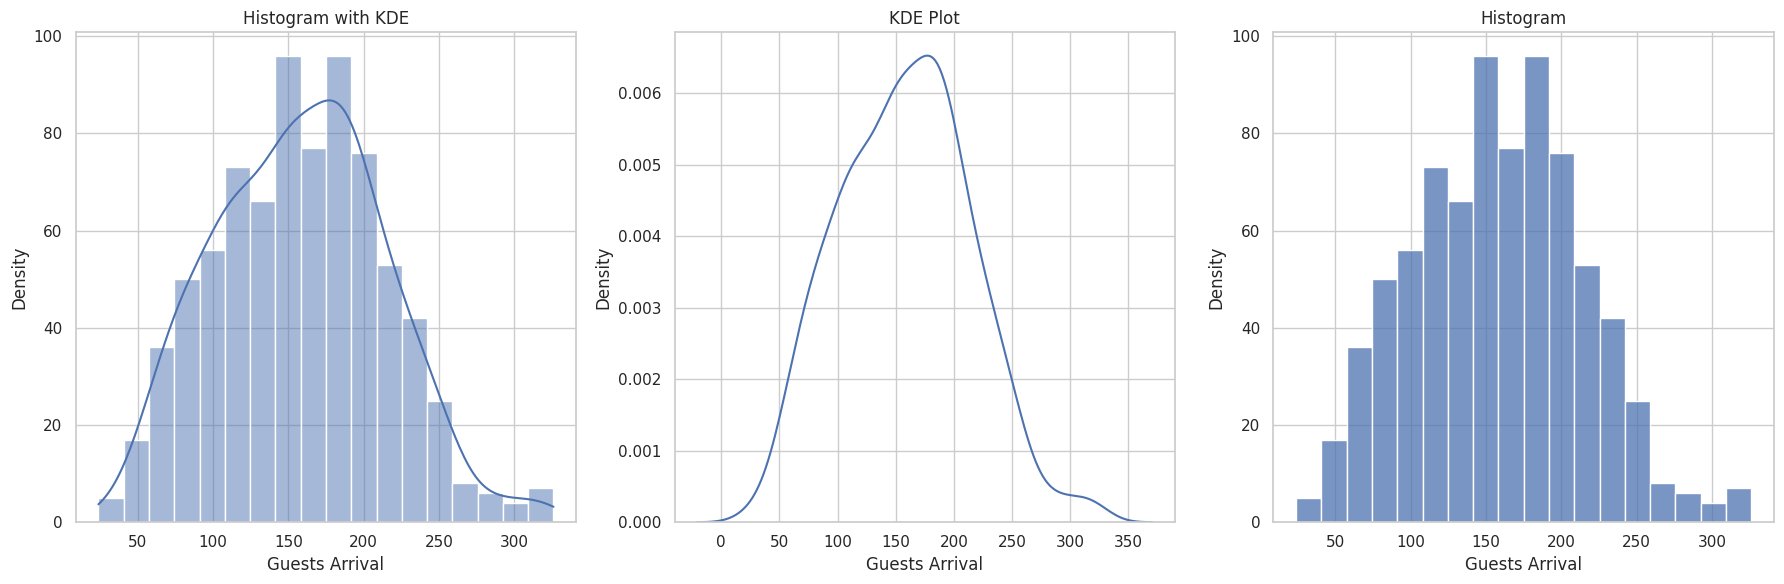

In [33]:
# Set the style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot a histogram with a KDE plot
sns.histplot(data=guests_arrival, kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE')

# Plot just a KDE plot
sns.kdeplot(data=guests_arrival, ax=axes[1])
axes[1].set_title('KDE Plot')

# Plot a simple histogram
sns.histplot(data=guests_arrival, ax=axes[2])
axes[2].set_title('Histogram')

# Add labels and titles
for ax in axes:
    ax.set_xlabel('Guests Arrival')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()